In [1]:
from google.colab import drive
drive.mount('/content/gdrive') # 點擊網址，選擇 Google 帳號登入，然後將授權碼貼回輸入框中

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ln -fs /content/gdrive/My\ Drive/Colab\ Notebooks/Datascience /app

In [3]:
!tar -xzvf /app/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [4]:
! ls /app/input

2006-2015PowernTemp.csv			      power_use102-108.csv
2006-2015PowernTempStr.csv		      sample_submission.csv
2006~2015system24hours_and_tempture_data.csv  Taipower_powerGen_sale.xlsx
2006_2015系統24小時與溫度資料統計.csv	      temp102-108.csv
2006~2015系統24小時與溫度資料統計.xlsx	      test.csv
2011-2018powerSaleTemp.csv		      train.csv
2011-2018x0x10x3x4.csv			      weather_102-108.csv
BicycleWeather.csv			      Weather_BuySale2011-2018.pbix
BuynSale.xlsx				      x0x10x3x4.pbix
buysale_raw.xlsx			      x3x4Prosperity_indicator.csv
data_description.txt			      x3x4景氣.csv
FremontBridge.csv			      氣溫95-108.xlsx
Google_Stock_Price_Test.csv		      用電量_需量.csv
Google_Stock_Price_Train.csv		      用電量_需量_use.csv
power_raw.xlsx


In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [0]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [0]:
#PowernTemp = pd.read_csv('/app/input/2006~2015system24hours_and_tempture_data.csv',index_col='date',parse_dates=True)
PowernTemp = pd.read_csv('/app/input/2006-2015PowernTempStr.csv',index_col='date',parse_dates=True)
columns = np.array(PowernTemp.columns)

for row, r in enumerate(PowernTemp):
    for col, c in enumerate(r):
      if is_number(r[col]):
        if r[col].find(',',0) != -1:
           r[col].str.replace(',','').astype(float)

In [13]:
print(PowernTemp.shape)
print(PowernTemp.head())

(810, 51)
            day  month     y0     y1     y2  ...  T20  T21  T22  T23  index
date                                         ...                           
2015-09-09    9      9  24005  23206  23020  ...   27   26   26   26    795
2015-09-08    8      9  23672  23168  23035  ...   27   26   26   26    794
2015-09-07    7      9  24418  23791  23423  ...   26   26   26   25    793
2015-09-04    4      9  25160  24387  24010  ...   29   28   28   28    792
2015-09-30   30      9  22170  21882  21734  ...   29   29   28   28    810

[5 rows x 51 columns]


In [14]:
PowernTemp.describe(include="all")

,day,month,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,index
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,15.787654,7.458025,24644.832099,23642.632099,22901.814815,22357.455556,22020.124691,21658.174074,21863.122222,23138.628395,26754.754321,28589.555556,29400.030864,30131.679012,29138.819753,30538.991358,30592.159259,30268.541975,29864.654321,29123.855556,29335.183951,29700.071605,29150.683951,28298.218519,27294.696296,26406.367901,27.265432,27.069136,26.870370,26.716049,26.544444,26.577778,27.317284,28.582716,29.779012,30.727160,31.345679,31.741975,31.740741,31.504938,31.100000,30.524691,29.872840,29.232099,28.703704,28.377778,28.146914,27.948148,27.700000,27.537037,405.500000
std,8.922789,1.110169,2088.353940,2044.138069,2017.309714,2011.417909,2032.586448,2078.588587,2092.145697,2099.490170,1769.451608,1856.315525,1928.038899,2021.115669,2049.531171,2194.319997,2159.108184,2052.535175,1911.185906,1713.875969,1628.362046,1725.595862,1767.756190,1833.591702,1946.023414,2012.512088,1.357091,1.319310,1.279963,1.239388,1.219384,1.221764,1.301068,1.439749,1.604014,1.776339,1.920294,1.966051,1.993672,1.992719,2.046704,1.972620,1.880846,1.762950,1.640378,1.549512,1.515277,1.457186,1.388679,1.352281,233.971152
min,1.000000,6.000000,18127.000000,17349.000000,16879.000000,16851.000000,16305.000000,16117.000000,16667.000000,18137.000000,19276.000000,20365.000000,21205.000000,21384.000000,21290.000000,21426.000000,21428.000000,21509.000000,21968.000000,22015.000000,21760.000000,21350.000000,20850.000000,20508.000000,19855.000000,19424.000000,21.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000,23.000000,23.000000,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,23.000000,22.000000,22.000000,22.000000,21.000000,21.000000,21.000000,21.000000,1.000000
25%,8.000000,6.000000,23216.750000,22291.250000,21588.500000,20944.000000,20545.000000,20048.250000,20212.000000,21495.500000,25642.500000,27509.250000,28222.750000,28934.750000,27942.750000,29292.750000,29337.750000,29071.500000,28702.500000,28016.750000,28304.500000,28522.500000,27926.750000,27027.000000,26028.250000,25103.250000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,27.000000,28.000000,29.000000,30.000000,30.000000,31.000000,31.000000,30.000000,30.000000,29.000000,29.000000,28.000000,28.000000,27.000000,27.000000,27.000000,27.000000,27.000000,203.250000
50%,16.000000,7.000000,24874.500000,23835.000000,23007.000000,22360.500000,21893.000000,21508.500000,21616.000000,22998.500000,26857.500000,28684.500000,29480.000000,30220.500000,29305.000000,30695.000000,30719.000000,30421.500000,30000.000000,29244.000000,29498.000000,29836.000000,29286.500000,28445.500000,27481.000000,26623.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,32.000000,32.000000,32.000000,31.000000,31.000000,30.000000,29.000000,29.000000,29.000000,28.000000,28.000000,28.000000,28.000000,405.500000
75%,24.000000,8.000000,26037.000000,25023.750000,24318.500000,23763.750000,23537.250000,23286.000000,23635.250000,24840.500000,28052.250000,29894.250000,30790.750000,31589.500000,30670.750000,32190.000000,32128.500000,31719.250000,31222.250000,30313.750000,30484.500000,30900.000000,30462.000000,29612.750000,28707.750000,27872.500000,28.000000,28.000000,28.000000,2

In [0]:
daily = PowernTemp.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [10]:
daily.head()

,Total
date,
2006-06-01,538362
2006-06-02,535381
2006-06-03,0
2006-06-04,0
2006-06-05,545102


In [17]:
cols = np.array(PowernTemp.columns)
cols

array(['day', 'month', 'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7',
       'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17',
       'y18', 'y19', 'y20', 'y21', 'y22', 'y23', 'T0', 'T1', 'T2', 'T3',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13',
       'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22',
       'T23', 'index'], dtype=object)

In [25]:
print(PowernTemp.iloc[:,[i for i in range(2,26) ]])

               y0     y1     y2     y3  ...    y20    y21    y22    y23
date                                    ...                            
2015-09-09  24005  23206  23020  22830  ...  27966  27150  26219  25155
2015-09-08  23672  23168  23035  22665  ...  28425  27521  26342  25417
2015-09-07  24418  23791  23423  23384  ...  27842  26932  25897  24913
2015-09-04  25160  24387  24010  23516  ...  29268  28457  27585  26772
2015-09-30  22170  21882  21734  21247  ...  28621  27629  26477  25414
...           ...    ...    ...    ...  ...    ...    ...    ...    ...
2006-06-15  21542  20501  19799  19230  ...  27213  26268  24881  23901
2006-06-14  20516  19563  18952  18398  ...  26640  25648  24210  23063
2006-06-13  20158  19212  18535  18124  ...  25728  24599  23046  21960
2006-06-12  18253  17349  16879  17192  ...  25069  23965  22466  22098
2006-06-01  18633  17841  17189  16892  ...  25735  24620  23053  21904

[810 rows x 24 columns]


In [26]:
Power = PowernTemp.iloc[:,[i for i in range(2,26) ]]
print(Power)

               y0     y1     y2     y3  ...    y20    y21    y22    y23
date                                    ...                            
2015-09-09  24005  23206  23020  22830  ...  27966  27150  26219  25155
2015-09-08  23672  23168  23035  22665  ...  28425  27521  26342  25417
2015-09-07  24418  23791  23423  23384  ...  27842  26932  25897  24913
2015-09-04  25160  24387  24010  23516  ...  29268  28457  27585  26772
2015-09-30  22170  21882  21734  21247  ...  28621  27629  26477  25414
...           ...    ...    ...    ...  ...    ...    ...    ...    ...
2006-06-15  21542  20501  19799  19230  ...  27213  26268  24881  23901
2006-06-14  20516  19563  18952  18398  ...  26640  25648  24210  23063
2006-06-13  20158  19212  18535  18124  ...  25728  24599  23046  21960
2006-06-12  18253  17349  16879  17192  ...  25069  23965  22466  22098
2006-06-01  18633  17841  17189  16892  ...  25735  24620  23053  21904

[810 rows x 24 columns]


In [28]:
print(Power.describe(include="all"))

                 y0            y1  ...           y22           y23
count    810.000000    810.000000  ...    810.000000    810.000000
mean   24644.832099  23642.632099  ...  27294.696296  26406.367901
std     2088.353940   2044.138069  ...   1946.023414   2012.512088
min    18127.000000  17349.000000  ...  19855.000000  19424.000000
25%    23216.750000  22291.250000  ...  26028.250000  25103.250000
50%    24874.500000  23835.000000  ...  27481.000000  26623.000000
75%    26037.000000  25023.750000  ...  28707.750000  27872.500000
max    29994.000000  29413.000000  ...  31651.000000  30838.000000

[8 rows x 24 columns]


In [0]:
daily = Power.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [30]:
print(daily.head())

             Total
date              
2006-06-01  537700
2006-06-02  534778
2006-06-03       0
2006-06-04       0
2006-06-05  544419


In [31]:
daily = daily[(daily.T != 0).any()]
print(daily.head())

             Total
date              
2006-06-01  537700
2006-06-02  534778
2006-06-05  544419
2006-06-06  564668
2006-06-07  570790


In [48]:
Temp = PowernTemp.iloc[:,[i for i in range(26,50) ]]
print(Temp)

            T0  T1  T2  T3  T4  T5  T6  ...  T17  T18  T19  T20  T21  T22  T23
date                                    ...                                   
2015-09-09  26  26  26  26  26  26  26  ...   28   28   28   27   26   26   26
2015-09-08  25  25  25  25  25  24  25  ...   28   28   28   27   26   26   26
2015-09-07  28  27  27  26  26  26  26  ...   26   26   26   26   26   26   25
2015-09-04  28  27  27  27  27  26  27  ...   30   30   29   29   28   28   28
2015-09-30  27  27  26  26  26  26  26  ...   29   29   29   29   29   28   28
...         ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...
2006-06-15  27  27  27  27  26  26  27  ...   30   29   29   29   28   28   28
2006-06-14  25  25  25  25  24  25  26  ...   30   29   29   28   28   28   27
2006-06-13  25  25  25  24  24  25  25  ...   27   26   26   26   26   26   25
2006-06-12  24  25  24  24  24  25  25  ...   25   25   25   25   25   25   25
2006-06-01  24  24  24  24  24  24  25  ...   28   2

In [34]:
print(Temp.describe(include="all"))

               T0          T1          T2  ...         T21         T22         T23
count  810.000000  810.000000  810.000000  ...  810.000000  810.000000  810.000000
mean    27.265432   27.069136   26.870370  ...   27.948148   27.700000   27.537037
std      1.357091    1.319310    1.279963  ...    1.457186    1.388679    1.352281
min     21.000000   21.000000   22.000000  ...   21.000000   21.000000   21.000000
25%     26.000000   26.000000   26.000000  ...   27.000000   27.000000   27.000000
50%     27.000000   27.000000   27.000000  ...   28.000000   28.000000   28.000000
75%     28.000000   28.000000   28.000000  ...   29.000000   29.000000   29.000000
max     30.000000   30.000000   30.000000  ...   31.000000   30.000000   30.000000

[8 rows x 24 columns]


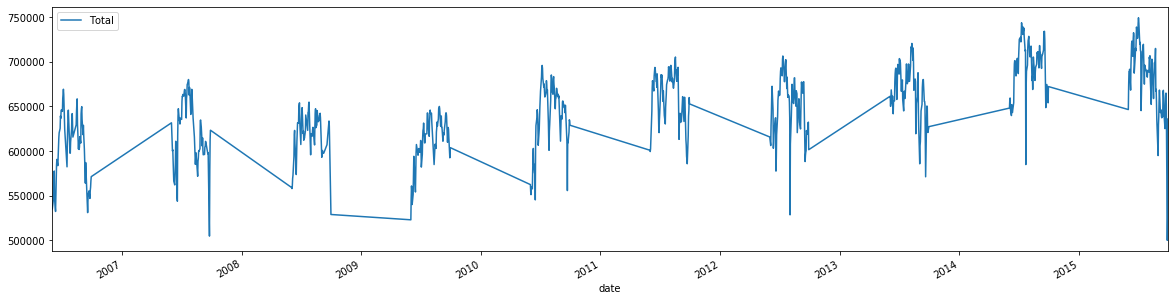

In [40]:
daily.plot(x_compat=True,figsize=(20,5))

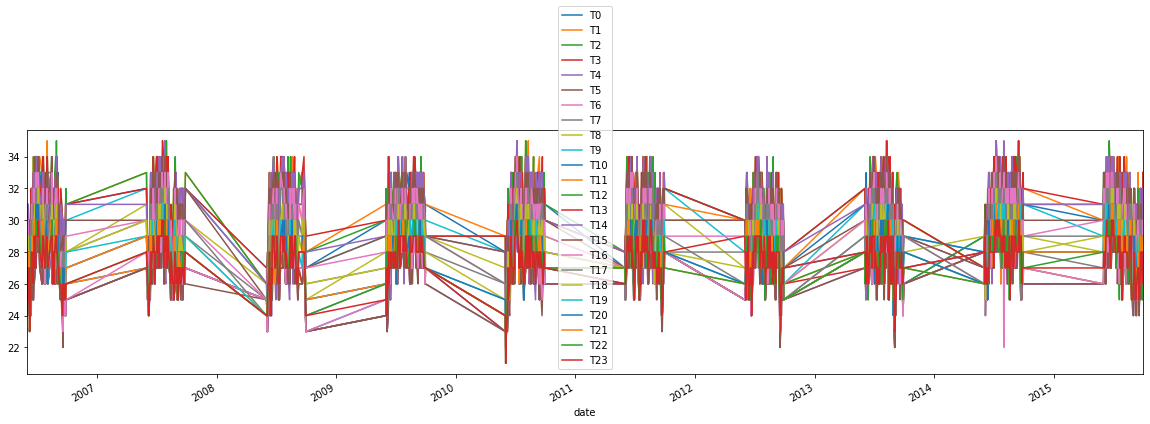

In [39]:
Temp.plot(figsize=(20,5))

In [0]:
#result = pd.concat([df1, df4], axis=1, join='inner')

In [44]:
col1 = Power.columns
col2 = Temp.columns
cols = col1.append(col2)
print(cols)

Index(['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'y21', 'y22', 'y23', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7',
       'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17',
       'T18', 'T19', 'T20', 'T21', 'T22', 'T23'],
      dtype='object')


In [0]:
X = PowernTemp[cols]
y = daily['Total']
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
daily['predicted'] = model.predict(X)

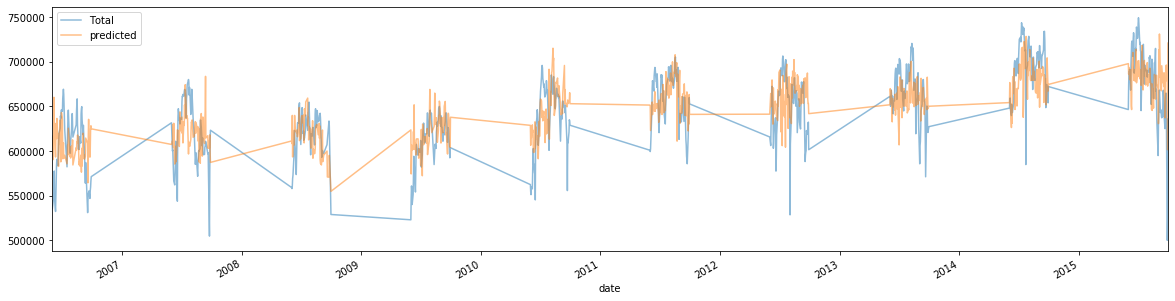

In [47]:
daily[['Total', 'predicted']].plot(alpha=0.5,figsize=(20,5));

In [49]:
params = pd.Series(model.coef_, index=X.columns)
params

y0        7.372527
y1        9.307716
y2      -21.214787
y3        3.939707
y4       21.388007
y5      -26.933199
y6       16.561895
y7      -23.115615
y8       12.719316
y9       27.333493
y10       3.508754
y11     -32.874674
y12      28.296353
y13     -19.409833
y14     -11.148810
y15      -3.704155
y16      -8.048626
y17      13.235526
y18      20.832579
y19       6.788033
y20      14.196815
y21      -5.982565
y22      -0.282027
y23     -40.323858
T0     -378.901201
T1      904.503512
T2    -2149.512811
T3      908.929487
T4     5240.668717
T5      -69.364453
T6     2304.673972
T7       59.190163
T8     2032.009286
T9     -260.803852
T10    2636.758041
T11     687.243021
T12      19.496483
T13    5450.800022
T14   -1329.942784
T15    1410.727039
T16    -702.876851
T17     483.074957
T18      30.680199
T19    1402.683730
T20   -5212.602327
T21    6610.137392
T22    6383.578573
T23     823.394440
dtype: float64

In [0]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
for i in range(1000)], 0)

In [51]:
print(pd.DataFrame({'effect': params.round(0),
                            'error': err.round(0)}))

     effect   error
y0      7.0     9.0
y1      9.0    14.0
y2    -21.0    15.0
y3      4.0    16.0
y4     21.0    17.0
y5    -27.0    14.0
y6     17.0    16.0
y7    -23.0    12.0
y8     13.0    10.0
y9     27.0    13.0
y10     4.0    16.0
y11   -33.0    16.0
y12    28.0    10.0
y13   -19.0    16.0
y14   -11.0    18.0
y15    -4.0    18.0
y16    -8.0    15.0
y17    13.0    11.0
y18    21.0     6.0
y19     7.0    16.0
y20    14.0    18.0
y21    -6.0    17.0
y22    -0.0    14.0
y23   -40.0    11.0
T0   -379.0  3299.0
T1    905.0  3915.0
T2  -2150.0  4203.0
T3    909.0  4355.0
T4   5241.0  4399.0
T5    -69.0  4477.0
T6   2305.0  2661.0
T7     59.0  2544.0
T8   2032.0  2825.0
T9   -261.0  3082.0
T10  2637.0  2889.0
T11   687.0  2580.0
T12    19.0  2248.0
T13  5451.0  2359.0
T14 -1330.0  2294.0
T15  1411.0  2535.0
T16  -703.0  2647.0
T17   483.0  2916.0
T18    31.0  3038.0
T19  1403.0  3306.0
T20 -5213.0  3710.0
T21  6610.0  3503.0
T22  6384.0  3484.0
T23   823.0  1619.0
